In [33]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
ds = pd.read_csv('Diversity.csv',encoding='latin1')
pr = pd.read_csv('Poverty rate.csv', encoding='latin1') # using encoding to solve the error: 'utf-8' codec can't decode. 
pk = pd.read_csv('Police Killings.csv',encoding='latin1')
mi = pd.read_csv('Median income.csv',encoding='latin1')
hs = pd.read_csv('HS.csv',encoding='latin1')

In [35]:
ds.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,0.672,0.302,0,0,0.016
1,AL,Abbeville city,0.544,0.414,0.001,0.01,0.031
2,AL,Adamsville city,0.523,0.449,0.005,0.003,0.023
3,AL,Addison town,0.991,0.001,0,0.001,0.004
4,AL,Akron town,0.132,0.865,0,0,0.003


In [36]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,0.788
1,AL,Abbeville city,0.291
2,AL,Adamsville city,0.255
3,AL,Addison town,0.307
4,AL,Akron town,0.42


In [37]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [38]:
mi.head()

,Geographic Area,City,Median Income
0,AZ,Stanfield CDP,4511
1,CA,Delft Colony CDP,6917
2,ND,Conway city,7083
3,AZ,Lower Santan Village CDP,7175
4,VA,Union Level CDP,8015


In [39]:
hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [40]:
print(len(ds))
print(len(mi))
print(len(pr))
print(len(hs))

29268
27385
29329
29329


In [41]:
# merge pr, mi, and hs

In [42]:
pk.rename(index=str, columns={'state':'Geographic Area', 'city':'City'}, inplace=True)
ds.rename(index=str, columns={'Geographic area':'Geographic Area'}, inplace=True)

hs = hs.merge(pr, how="left", on=["Geographic Area", "City"])
hs = hs.merge(mi, how="left", on=["Geographic Area", "City"])
hs = hs.merge(ds, how="left", on=["Geographic Area", "City"])

hs.rename(index=str, columns={'Geographic Area':'Geographic_Area'}, inplace=True)

In [43]:
hs.head()

,Geographic_Area,City,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,0.788,11207.0,0.672,0.302,0,0,0.016
1,AL,Abbeville city,69.1,0.291,25615.0,0.544,0.414,0.001,0.01,0.031
2,AL,Adamsville city,78.9,0.255,42575.0,0.523,0.449,0.005,0.003,0.023
3,AL,Addison town,81.4,0.307,37083.0,0.991,0.001,0,0.001,0.004
4,AL,Akron town,68.6,0.42,21667.0,0.132,0.865,0,0,0.003


In [44]:
hs.isnull().sum()

Geographic_Area             0
City                        0
percent_completed_hs        0
poverty_rate                0
Median Income            1946
share_white               207
share_black               207
share_native_american     207
share_asian               207
share_hispanic            207
dtype: int64

In [45]:
# for convenience, i will just drop the null values
hs = hs.dropna()

In [46]:
# create a new table with grouped value for each state

In [47]:
# the values in the original table are str type

hs['poverty_rate']=[float(x) for x in hs['poverty_rate']]
hs['Median Income']=[float(x) for x in hs['Median Income']]
hs['percent_completed_hs']=[float(x) for x in hs['percent_completed_hs']]
hs['share_white']=[float(x) for x in hs['share_white']]
hs['share_black']=[float(x) for x in hs['share_black']]
hs['share_native_american']=[float(x) for x in hs['share_native_american']]
hs['share_asian']=[float(x) for x in hs['share_asian']]
hs['share_hispanic']=[float(x) for x in hs['share_hispanic']]



# create a dataframe ot store values for the new table
all_poverty_rate = pd.DataFrame(hs.groupby('Geographic_Area')["poverty_rate"].mean())
all_poverty_rate['median_income'] = hs.groupby('Geographic_Area')["Median Income"].mean()
all_poverty_rate['percent_completed_hs'] = hs.groupby('Geographic_Area')["percent_completed_hs"].mean()
all_poverty_rate['share_white'] = hs.groupby('Geographic_Area')["share_white"].mean()
all_poverty_rate['share_black'] = hs.groupby('Geographic_Area')["share_black"].mean()
all_poverty_rate['share_native_american'] = hs.groupby('Geographic_Area')["share_native_american"].mean()
all_poverty_rate['share_asian'] = hs.groupby('Geographic_Area')["share_asian"].mean()
all_poverty_rate['share_hispanic'] = hs.groupby('Geographic_Area')["share_hispanic"].mean()
all_poverty_rate=all_poverty_rate.reset_index()
all_poverty_rate.head()

,Geographic_Area,poverty_rate,median_income,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,0.201561,52041.554386,84.914737,0.399411,0.006102,0.512968,0.016228,0.020947
1,AL,0.203568,40433.810761,80.694620,0.733545,0.224013,0.006384,0.005109,0.030625
2,AR,0.230961,35507.099609,80.287500,0.782271,0.166639,0.007145,0.004809,0.041883
3,AZ,0.251437,42512.921833,80.553369,0.612825,0.010111,0.264221,0.007809,0.217402
4,CA,0.167686,62165.578475,81.754858,0.705828,0.029236,0.016732,0.060388,0.309078


In [48]:
sapr = all_poverty_rate.sort_values(by=['poverty_rate'], ascending=False)
sapr.head()

,Geographic_Area,poverty_rate,median_income,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
25,MS,0.271850,34780.482353,78.469412,0.532847,0.424653,0.014547,0.005659,0.023703
3,AZ,0.251437,42512.921833,80.553369,0.612825,0.010111,0.264221,0.007809,0.217402
10,GA,0.240146,39654.682196,78.986356,0.621293,0.310173,0.003037,0.015115,0.064677
2,AR,0.230961,35507.099609,80.287500,0.782271,0.166639,0.007145,0.004809,0.041883
32,NM,0.228502,41046.793651,81.202857,0.617997,0.007822,0.187714,0.005460,0.442378


Text(0.5,1,'Average poverty rate in each state')

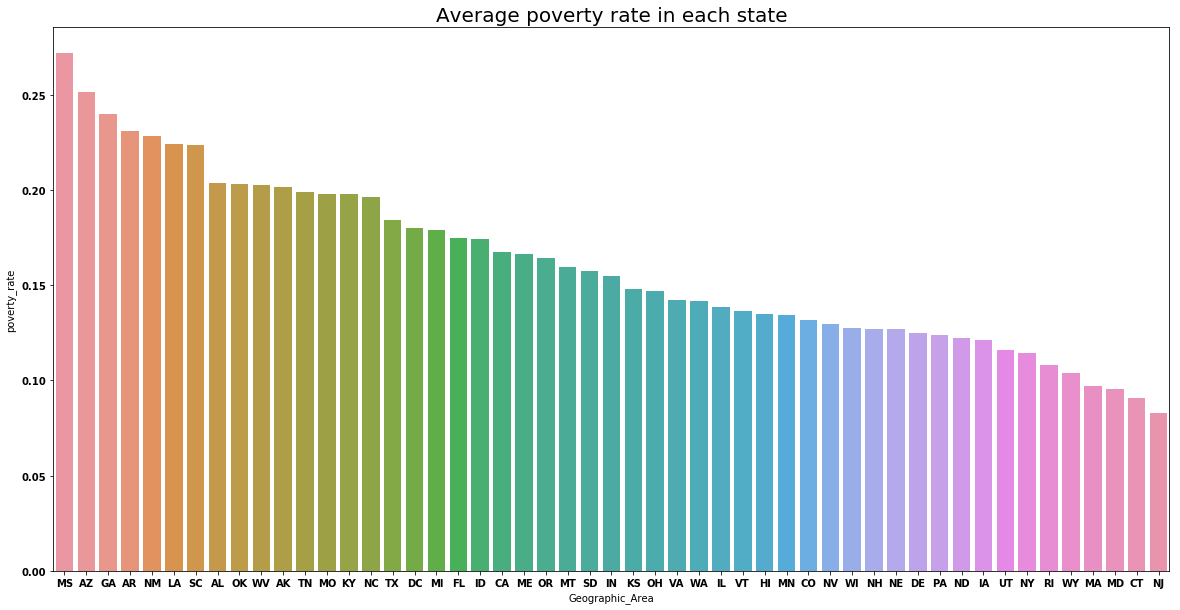

In [49]:
plt.figure(figsize=(20,10))
sns.barplot('Geographic_Area', 'poverty_rate', data=sapr)
plt.title('Average poverty rate in each state', size=20)

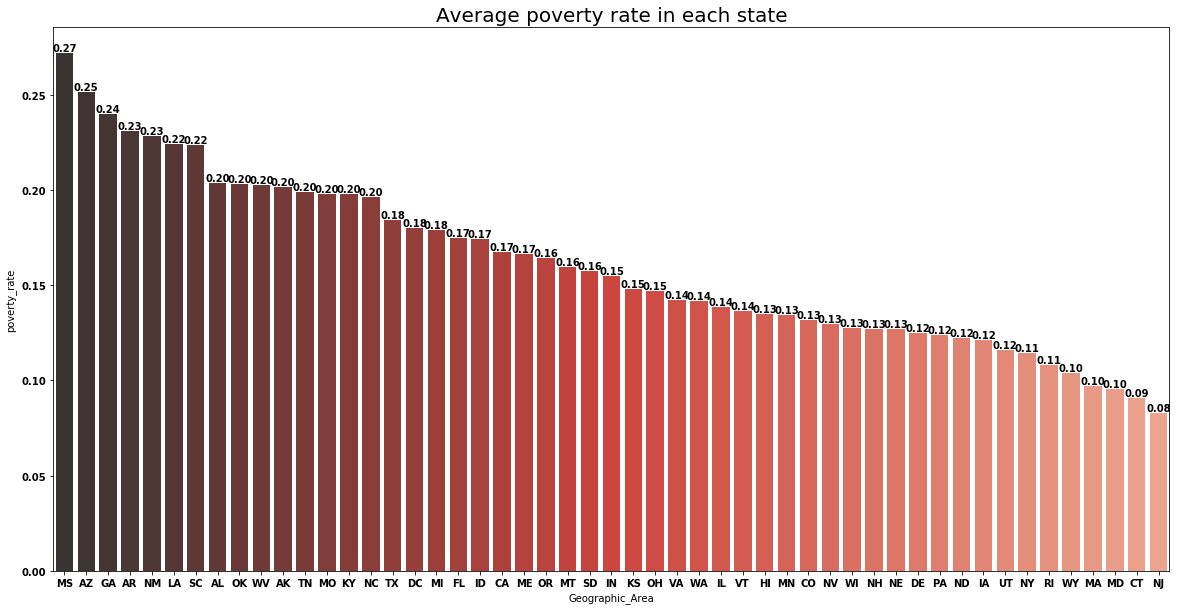

   Geographic_Area  poverty_rate
25              MS       0.27185
   Geographic_Area  poverty_rate
31              NJ      0.083024


In [108]:
# if the table is already sorted, then only need one .argsort(). if not will need 2 .argsort() to have the color math
# with the value of the variable. darkest being the highest value and lightest being the lowest value.

# show the decrease in each bar with color - dark to light(::-1). light to dark(::1)
plt.figure(figsize=(20,10))
pal = sns.color_palette("Reds_d", len(sapr))
rank = sapr["poverty_rate"].argsort() # need to use argsort 2 times to get this affect
g=sns.barplot(x='Geographic_Area',y='poverty_rate', data=sapr, palette=np.array(pal[::-1])[rank])
plt.title('Average poverty rate in each state', size=20)

for i in g.patches:
    height = i.get_height()# get the values of each bar - poverty rate here
    g.text(i.get_x()+i.get_width()/2., # control the value on top of each bar left or right
    height + 0.001,# control the values up or down in each bar
    '{:1.2f}'.format(height),
    ha='center')#make sure the values are right in the cdnter on top of each bar
plt.show()

maxp = sapr[sapr['poverty_rate']==sapr['poverty_rate'].max()]
maxp=maxp.iloc[:,0:2]
minp = sapr[sapr['poverty_rate']==sapr['poverty_rate'].min()]
minp=minp.iloc[:,0:2]
print(maxp,minp,sep='\n')

In [51]:
# median income

In [52]:
g2 = all_poverty_rate.sort_values(by=['median_income'], ascending=False)

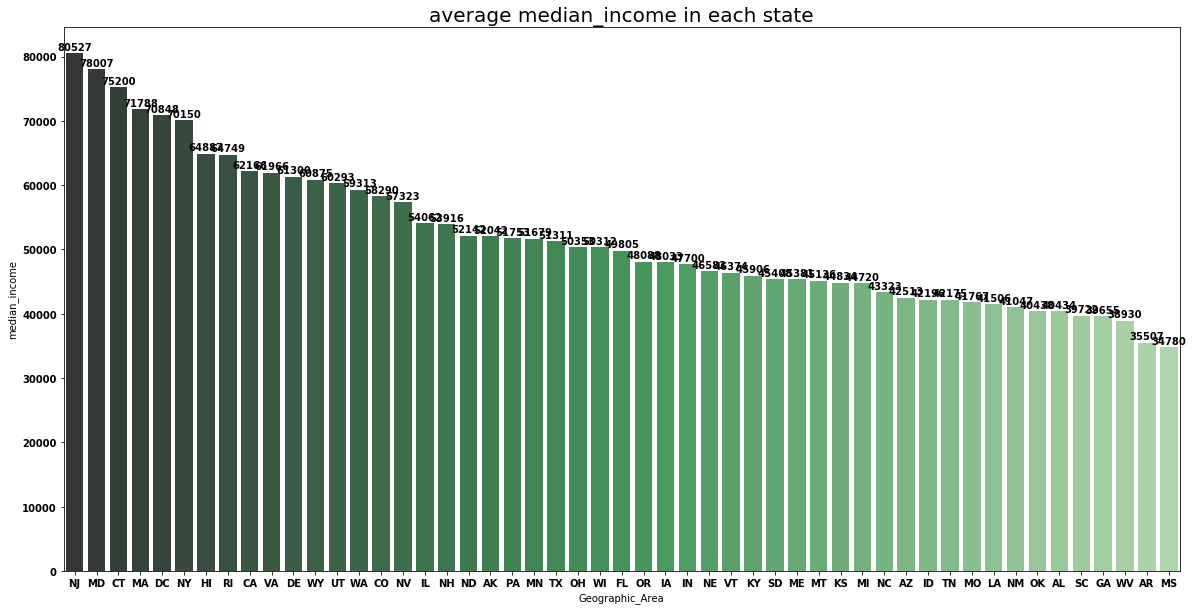

   Geographic_Area  poverty_rate  median_income
31              NJ      0.083024   80527.379699
   Geographic_Area  poverty_rate  median_income
25              MS       0.27185   34780.482353


In [109]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("Greens_d", len(g2))
rank = g2["median_income"].argsort().argsort() # need to use argsort 2 times to get this affect
g=sns.barplot(x='Geographic_Area',y='median_income', data=g2, palette=np.array(pal[::-1])[rank])
plt.title('average median_income in each state', size=20)

for i in g.patches:
    height = i.get_height()# get the values of each bar - median income
    g.text(i.get_x()+i.get_width()/2., # control the value on top of each bar left or right
    height + 500,# control the values up or down in each bar
    '{:1.0f}'.format(height),
    ha='center')#make sure the values are right in the cdnter on top of each bar
plt.show()

maxp = sapr[sapr['median_income']==sapr['median_income'].max()]
maxp=maxp.iloc[:,0:3]
minp = sapr[sapr['median_income']==sapr['median_income'].min()]
minp=minp.iloc[:,0:3]
print(maxp,minp,sep='\n')

In [54]:
# high school completion rate in each state

In [55]:
g3 = all_poverty_rate.sort_values(by=['percent_completed_hs'], ascending=False)

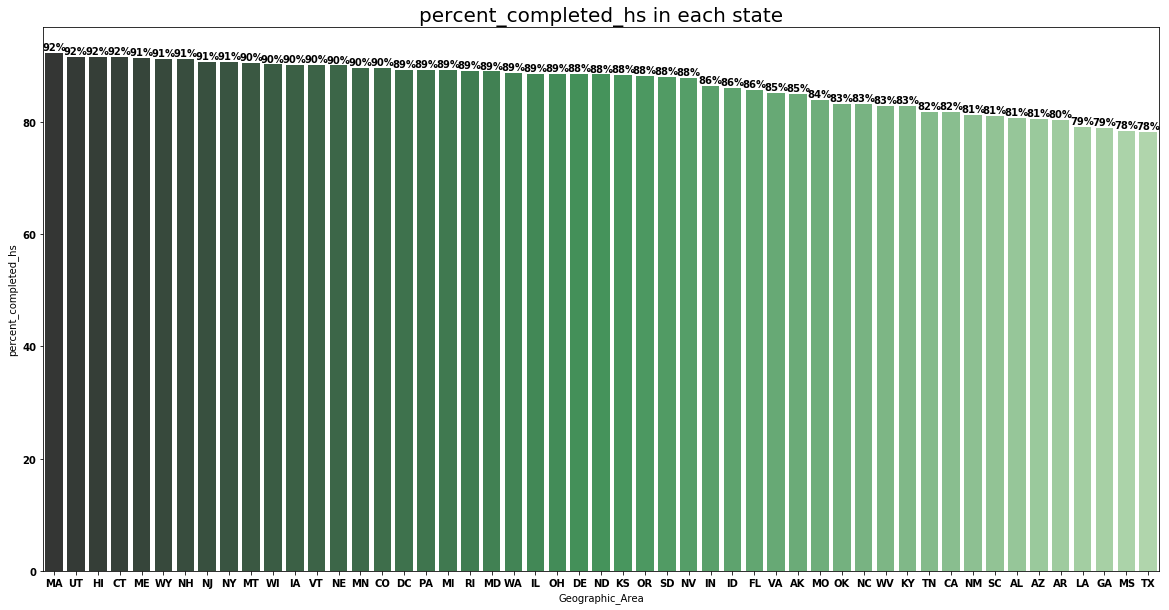

   Geographic_Area  poverty_rate  median_income  percent_completed_hs
19              MA       0.09731    71788.39749             92.259414
   Geographic_Area  poverty_rate  median_income  percent_completed_hs
43              TX      0.184498   51311.108214             78.194198


In [116]:
from matplotlib import rc
rc('font', weight='bold') # all the name of the state are now bold.

plt.figure(figsize=(20,10))
pal = sns.color_palette("Greens_d", len(g3))
rank = g3["percent_completed_hs"].argsort().argsort() # need to use argsort 2 times to get this affect
g=sns.barplot(x='Geographic_Area',y='percent_completed_hs', data=g3, palette=np.array(pal[::-1])[rank])
plt.title('percent_completed_hs in each state', size=20)

for i in g.patches:
    height = i.get_height()# get the values of each bar - median income
    g.text(i.get_x()+i.get_width()/2., # control the value on top of each bar left or right
    height + 0.5,# control the values up or down in each bar
    '{:1.0f}%'.format(height),
    ha='center')#make sure the values are right in the cdnter on top of each bar
plt.show()

maxp = sapr[sapr['percent_completed_hs']==sapr['percent_completed_hs'].max()]
maxp=maxp.iloc[:,0:4]
minp = sapr[sapr['percent_completed_hs']==sapr['percent_completed_hs'].min()]
minp=minp.iloc[:,0:4]
print(maxp,minp,sep='\n')

Text(0.5,1,'Comparison between poverty_rate and percent_completed_hs')

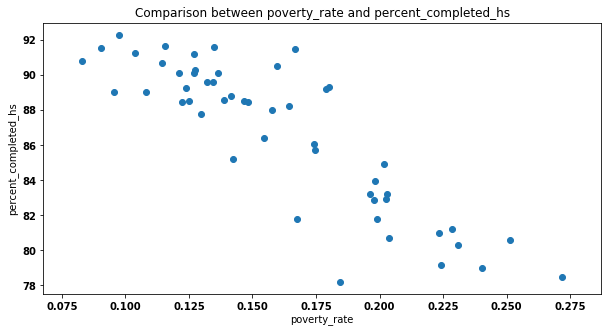

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(all_poverty_rate['poverty_rate'],all_poverty_rate['percent_completed_hs'],)
plt.xlabel('poverty_rate')
plt.ylabel('percent_completed_hs')
plt.title('Comparison between poverty_rate and percent_completed_hs')

#shows a strong correclation

Text(0.5,1,'Comparison between percent_completed_hs and median_income')

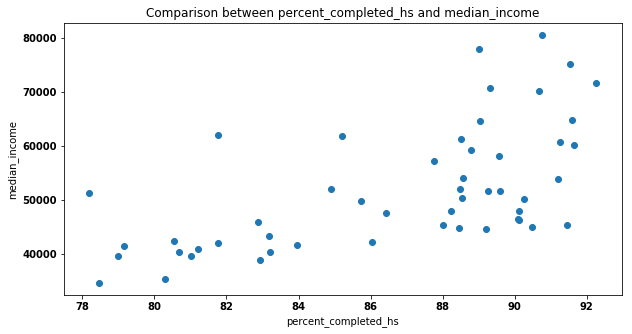

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(all_poverty_rate['percent_completed_hs'],all_poverty_rate['median_income'],)
plt.xlabel('percent_completed_hs')
plt.ylabel('median_income')
plt.title('Comparison between percent_completed_hs and median_income')

# a pretty good correclation.

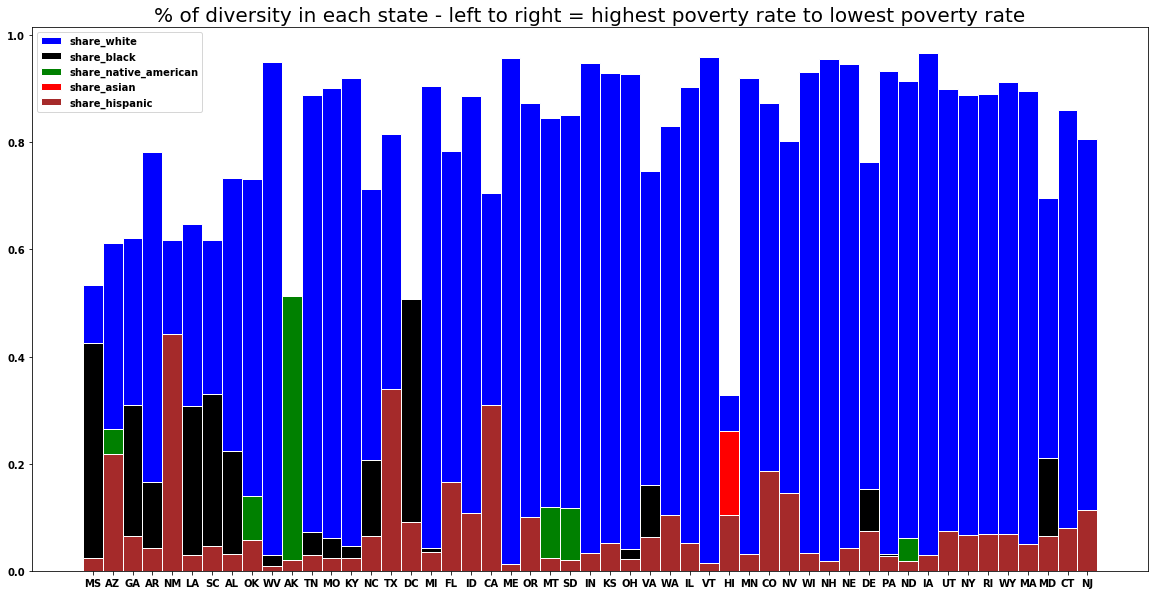

In [59]:
plt.figure(figsize=(20,10))
r = [int(x) for x in range(0, 51)]
barWidth=1 # ZThe visual will look better
plt.bar(r, sapr['share_white'], color='blue', edgecolor='white', width=barWidth,label='share_white')
plt.bar(r, sapr['share_black'], color='black', edgecolor='white', width=barWidth,label='share_black')
plt.bar(r, sapr['share_native_american'], color='green', edgecolor='white', width=barWidth,label='share_native_american')
plt.bar(r, sapr['share_asian'], color='red', edgecolor='white', width=barWidth,label='share_asian')
plt.bar(r, sapr['share_hispanic'], color='brown', edgecolor='white', width=barWidth,label='share_hispanic')

plt.xticks(r, sapr['Geographic_Area'] , fontweight='bold')

plt.title('% of diversity in each state - left to right = highest poverty rate to lowest poverty rate',size=20)
plt.legend()
plt.show()

In [61]:
all_poverty_rate.head()

,Geographic_Area,poverty_rate,median_income,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,0.201561,52041.554386,84.914737,0.399411,0.006102,0.512968,0.016228,0.020947
1,AL,0.203568,40433.810761,80.694620,0.733545,0.224013,0.006384,0.005109,0.030625
2,AR,0.230961,35507.099609,80.287500,0.782271,0.166639,0.007145,0.004809,0.041883
3,AZ,0.251437,42512.921833,80.553369,0.612825,0.010111,0.264221,0.007809,0.217402
4,CA,0.167686,62165.578475,81.754858,0.705828,0.029236,0.016732,0.060388,0.309078


In [62]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,City,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


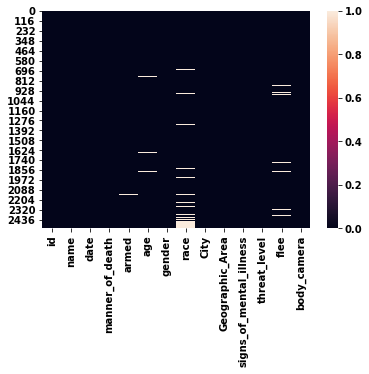

In [119]:
# any null values?
sns.heatmap(pk.isnull())

In [120]:
# for convenince's sake, i will just drop those null values
pk = pk.dropna()

In [63]:
pk.rename(index=str, columns={'Geographic Area':'Geographic_Area'}, inplace=True)

In [64]:
total_death_state = pd.DataFrame(pk.groupby('Geographic_Area')['manner_of_death'].count()).reset_index()
total_death_state.sort_values(by='manner_of_death', ascending=False, inplace=True)
total_death_state.head()

,Geographic_Area,manner_of_death
4,CA,424
43,TX,225
9,FL,154
3,AZ,118
35,OH,79


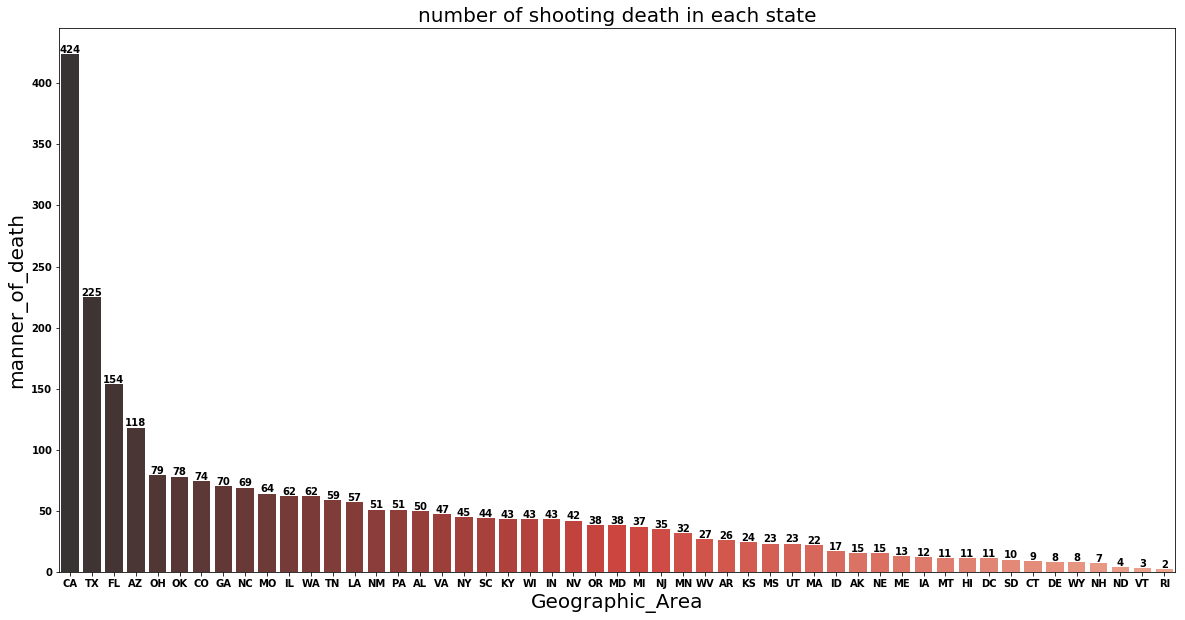

          Date range from  01/01/16  to  31/12/16


In [66]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("Reds_d", len(total_death_state))
rank = total_death_state["manner_of_death"].argsort().argsort() # need to use argsort 2 times to get this affect
g = sns.barplot(x='Geographic_Area',y='manner_of_death', data=total_death_state, palette=np.array(pal[::-1])[rank])

plt.title('number of shooting death in each state', size=20)
plt.xlabel('Geographic_Area', size=20)
plt.ylabel('manner_of_death', size=20)

for i in g.patches:
    height = i.get_height()# get the values of each bar - poverty rate here
    g.text(i.get_x()+i.get_width()/2., # control the value on top of each bar left or right
    height + 1,# control the values up or down in each bar
    '{:1.0f}'.format(height),
    ha='center')#make sure the values are right in the cdnter on top of each bar
plt.show()

print('          Date range from ',pk['date'].min(),' to ', pk['date'].max())

In [152]:
death_by_gender = pd.DataFrame(pk.groupby(['Geographic_Area','gender'])['manner_of_death'].count())
death_by_gender = death_by_gender.reset_index()
death_by_gender.head()

,Geographic_Area,gender,manner_of_death
0,AK,F,1
1,AK,M,13
2,AL,F,4
3,AL,M,41
4,AR,M,20


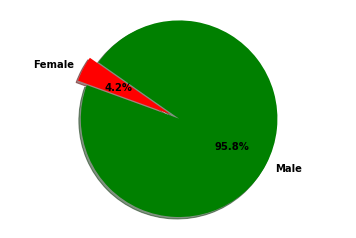

In [211]:
total_death = death_by_gender['manner_of_death'].sum()
total_F_death = death_by_gender.groupby(death_by_gender['gender']=='F')['manner_of_death'].sum()
total_M_death = death_by_gender.groupby(death_by_gender['gender']=='M')['manner_of_death'].sum()

labels = 'Female', 'Male'
sizes = [total_F_death[1], total_M_death[1]]
colors = ['red','green']
explode=(0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=145)
plt.axis('equal')
plt.show()

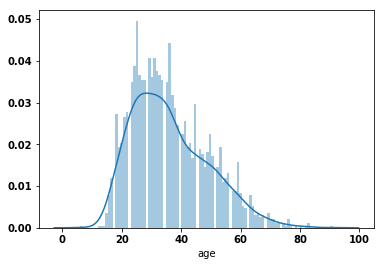

In [214]:
sns.distplot(pk['age'], bins=100)

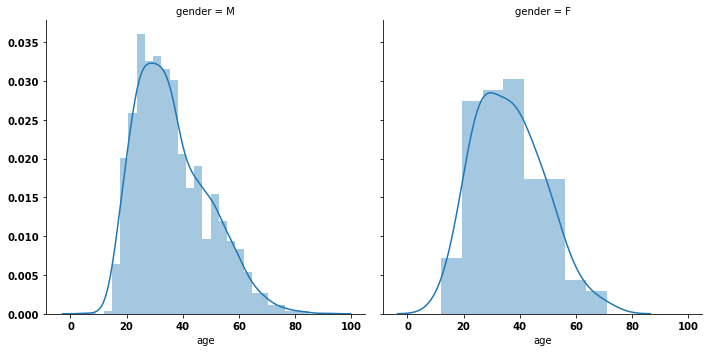

In [218]:
g = sns.FacetGrid(pk, col='gender', size=5)
g.map(sns.distplot, 'age')